In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=23ca3f74c011b5663163a441a6cbe2ed


In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | coquimbo
Processing Record 3 of Set 1 | troitsko-pechorsk
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | lahat
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | zemio
Processing Record 15 of Set 1 | ningan
City not found. Skipping...
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | zhigansk
Processing Record 19 of Set 1 | sao geraldo do araguaia
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | marzuq
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 1 | kincardine
Processing Record 24 

Processing Record 42 of Set 4 | favara
Processing Record 43 of Set 4 | buala
Processing Record 44 of Set 4 | sobolevo
Processing Record 45 of Set 4 | narsaq
Processing Record 46 of Set 4 | margate
Processing Record 47 of Set 4 | nanortalik
Processing Record 48 of Set 4 | chuy
Processing Record 49 of Set 4 | saint george
Processing Record 50 of Set 4 | sand
Processing Record 1 of Set 5 | luderitz
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | olavarria
Processing Record 4 of Set 5 | canutama
Processing Record 5 of Set 5 | port lincoln
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of Set 5 | cam ranh
Processing Record 8 of Set 5 | one hundred mile house
City not found. Skipping...
Processing Record 9 of Set 5 | rocha
Processing Record 10 of Set 5 | port hawkesbury
Processing Record 11 of Set 5 | ferme-neuve
Processing Record 12 of Set 5 | te anau
Processing Record 13 of Set 5 | tambo
Processing Record 14 of Set 5 | dharan
Processing Record 15 of Se

Processing Record 27 of Set 8 | nome
Processing Record 28 of Set 8 | willmar
Processing Record 29 of Set 8 | silvania
Processing Record 30 of Set 8 | marsh harbour
Processing Record 31 of Set 8 | bunbury
Processing Record 32 of Set 8 | la cruz
Processing Record 33 of Set 8 | great falls
Processing Record 34 of Set 8 | hobyo
Processing Record 35 of Set 8 | tessalit
Processing Record 36 of Set 8 | yola
Processing Record 37 of Set 8 | vila franca do campo
Processing Record 38 of Set 8 | san cristobal
Processing Record 39 of Set 8 | halalo
City not found. Skipping...
Processing Record 40 of Set 8 | bababe
City not found. Skipping...
Processing Record 41 of Set 8 | stokmarknes
Processing Record 42 of Set 8 | aleysk
Processing Record 43 of Set 8 | jiamusi
Processing Record 44 of Set 8 | muzquiz
City not found. Skipping...
Processing Record 45 of Set 8 | namatanai
Processing Record 46 of Set 8 | abonnema
Processing Record 47 of Set 8 | marcona
City not found. Skipping...
Processing Record 48 

Processing Record 12 of Set 12 | yuancheng
Processing Record 13 of Set 12 | wokha
Processing Record 14 of Set 12 | dakar
Processing Record 15 of Set 12 | lukulu
Processing Record 16 of Set 12 | imbituba
Processing Record 17 of Set 12 | soyo
Processing Record 18 of Set 12 | redcliffe
Processing Record 19 of Set 12 | namibe
Processing Record 20 of Set 12 | arawa
Processing Record 21 of Set 12 | sulphur
Processing Record 22 of Set 12 | kununurra
Processing Record 23 of Set 12 | jerantut
Processing Record 24 of Set 12 | pacific grove
Processing Record 25 of Set 12 | kajaani
Processing Record 26 of Set 12 | kenai
Processing Record 27 of Set 12 | beringovskiy
Processing Record 28 of Set 12 | kaeo
Processing Record 29 of Set 12 | maragogi
Processing Record 30 of Set 12 | plettenberg bay
Processing Record 31 of Set 12 | meulaboh
Processing Record 32 of Set 12 | mancio lima
Processing Record 33 of Set 12 | temaraia
City not found. Skipping...
Processing Record 34 of Set 12 | cracaoani
City not 

In [11]:
len(city_data)

542

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.59,26.89,52.75,70,34,7.96,ZA,2020-09-27 23:37:28
1,Coquimbo,-29.95,-71.34,55.40,82,0,9.17,CL,2020-09-27 23:34:19
2,Troitsko-Pechorsk,62.71,56.20,48.25,96,94,2.53,RU,2020-09-27 23:37:28
3,Busselton,-33.65,115.33,57.99,90,59,9.37,AU,2020-09-27 23:37:28
4,Kahului,20.89,-156.47,89.60,52,40,21.92,US,2020-09-27 23:33:16
5,Hobart,-42.88,147.33,55.99,54,40,13.87,AU,2020-09-27 23:33:33
6,Lahat,-3.80,103.53,74.62,73,100,2.24,ID,2020-09-27 23:37:29
7,Airai,-8.93,125.41,71.35,51,41,4.99,TL,2020-09-27 23:37:29
8,Qaanaaq,77.48,-69.36,13.15,76,17,7.18,GL,2020-09-27 23:37:30
9,Hilo,19.73,-155.09,86.00,51,1,9.17,US,2020-09-27 23:36:00


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2020-09-27 23:37:28,-33.59,26.89,52.75,70,34,7.96
1,Coquimbo,CL,2020-09-27 23:34:19,-29.95,-71.34,55.40,82,0,9.17
2,Troitsko-Pechorsk,RU,2020-09-27 23:37:28,62.71,56.20,48.25,96,94,2.53
3,Busselton,AU,2020-09-27 23:37:28,-33.65,115.33,57.99,90,59,9.37
4,Kahului,US,2020-09-27 23:33:16,20.89,-156.47,89.60,52,40,21.92
5,Hobart,AU,2020-09-27 23:33:33,-42.88,147.33,55.99,54,40,13.87
6,Lahat,ID,2020-09-27 23:37:29,-3.80,103.53,74.62,73,100,2.24
7,Airai,TL,2020-09-27 23:37:29,-8.93,125.41,71.35,51,41,4.99
8,Qaanaaq,GL,2020-09-27 23:37:30,77.48,-69.36,13.15,76,17,7.18
9,Hilo,US,2020-09-27 23:36:00,19.73,-155.09,86.00,51,1,9.17


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/27/20'

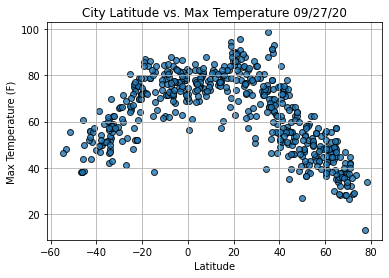

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

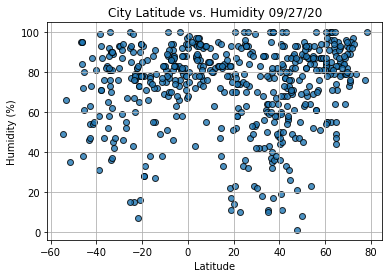

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

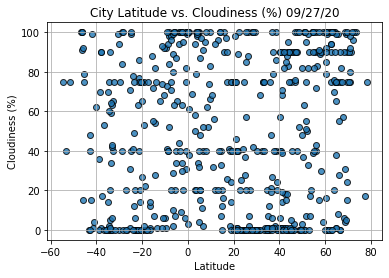

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

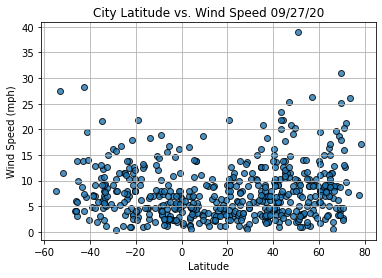

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()